# Importing Libraries

In [127]:
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance

# Getting Data

In [128]:
dataset = pd.read_csv('tracks_features.csv')

In [129]:
print(dataset.iloc[0:5, :])

                       id                   name                      album  \
0  7lmeHLHBe4nmXzuXc0HDjk                Testify  The Battle Of Los Angeles   
1  1wsRitfRRtWyEapl0q22o8        Guerrilla Radio  The Battle Of Los Angeles   
2  1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb  The Battle Of Los Angeles   
3  2lbASgTSoDO7MTuLAXlTW0              Mic Check  The Battle Of Los Angeles   
4  1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire  The Battle Of Los Angeles   

                 album_id                       artists  \
0  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
1  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
2  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
3  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
4  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   

                   artist_ids  track_number  disc_number  explicit  \
0  ['2d0hyoQ5ynDBnkvAbJKORj']             1            1     False   
1  ['2d0hyoQ5ynDBnkvAbJKORj'] 

In [130]:
X = dataset.iloc[ : , [4, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22]]
X_val = X.values

In [131]:
print(X_val[0:5, :])

[["['Rage Against The Machine']" 0.47 0.978 7 -5.399 1 0.0727 0.0261
  1.09e-05 0.356 0.503 117.906 210133 1999]
 ["['Rage Against The Machine']" 0.599 0.957 11 -5.763999999999999 1
  0.188 0.0129 7.06e-05 0.155 0.489 103.68 206200 1999]
 ["['Rage Against The Machine']" 0.315 0.97 7 -5.424 1 0.483 0.0234
  2.03e-06 0.122 0.37 149.749 298893 1999]
 ["['Rage Against The Machine']" 0.44 0.967 11 -5.83 0 0.237 0.163
  3.64e-06 0.121 0.574 96.752 213640 1999]
 ["['Rage Against The Machine']" 0.426 0.929 2 -6.729 1 0.0701 0.00162
  0.105 0.0789 0.539 127.059 205600 1999]]


# Data Preprocessing

In [132]:
from sklearn.preprocessing import OrdinalEncoder

Ord_Enc_name = OrdinalEncoder()
X_val[ : , [0]] = Ord_Enc_name.fit_transform(X_val[ : , [0]])

In [133]:
print(X_val[0:5, :])

[[120921.0 0.47 0.978 7 -5.399 1 0.0727 0.0261 1.09e-05 0.356 0.503
  117.906 210133 1999]
 [120921.0 0.599 0.957 11 -5.763999999999999 1 0.188 0.0129 7.06e-05
  0.155 0.489 103.68 206200 1999]
 [120921.0 0.315 0.97 7 -5.424 1 0.483 0.0234 2.03e-06 0.122 0.37 149.749
  298893 1999]
 [120921.0 0.44 0.967 11 -5.83 0 0.237 0.163 3.64e-06 0.121 0.574 96.752
  213640 1999]
 [120921.0 0.426 0.929 2 -6.729 1 0.0701 0.00162 0.105 0.0789 0.539
  127.059 205600 1999]]


In [134]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_val[:, [0, 3, 4, 11, 12, 13]] = sc.fit_transform(X_val[:, [0, 3, 4, 11, 12, 13]])
print(X_val[0:6, :])

[[0.7760313166942202 0.47 0.978 0.5105985094285523 0.9180155784801944 1
  0.0727 0.0261 1.09e-05 0.356 0.503 0.008780679869455412
  -0.23862148938608052 -0.6881827433075928]
 [0.7760313166942202 0.599 0.957 1.6415869581746705 0.8657392577358197 1
  0.188 0.0129 7.06e-05 0.155 0.489 -0.451056552285268
  -0.2628677933855762 -0.6881827433075928]
 [0.7760313166942202 0.315 0.97 0.5105985094285523 0.9144350085661961 1
  0.483 0.0234 2.03e-06 0.122 0.37 1.038064876657228 0.30856944450541135
  -0.6881827433075928]
 [0.7760313166942202 0.44 0.967 1.6415869581746705 0.8562865531628642 0
  0.237 0.163 3.64e-06 0.121 0.574 -0.674995280274016
  -0.21700140595708706 -0.6881827433075928]
 [0.7760313166942202 0.426 0.929 -0.9031370515040952 0.7275292590554862 1
  0.0701 0.00162 0.105 0.0789 0.539 0.30463968351856124
  -0.26656669559755114 -0.6881827433075928]
 [0.7760313166942202 0.298 0.848 -0.9031370515040952 0.8395294859653522 1
  0.0727 0.0538 0.0015199999999999 0.201 0.1939999999999999
  0.99064

# Choosing number of clusters

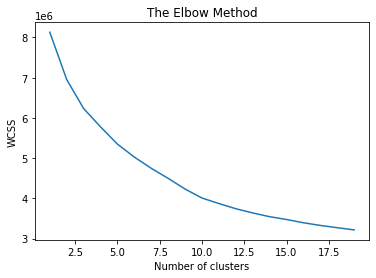

In [89]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 20):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_val)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Training K Means Clustering Method

In [135]:
from sklearn.cluster import KMeans

kmeans_10 = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans_10 = kmeans_10.fit_predict(X_val)

# Getting Clusters as Numpy Arrays

In [137]:
Ten_0_cluster = np.zeros([len(dataset), 15])
Ten_1_cluster = np.zeros([len(dataset), 15])
Ten_2_cluster = np.zeros([len(dataset), 15])
Ten_3_cluster = np.zeros([len(dataset), 15])
Ten_4_cluster = np.zeros([len(dataset), 15])
Ten_5_cluster = np.zeros([len(dataset), 15])
Ten_6_cluster = np.zeros([len(dataset), 15])
Ten_7_cluster = np.zeros([len(dataset), 15])
Ten_8_cluster = np.zeros([len(dataset), 15])
Ten_9_cluster = np.zeros([len(dataset), 15])

for i in range(0, len(dataset)):
    if y_kmeans_10[i] == 0:
        Ten_0_cluster[i, 0:14] = Ten_0_cluster[i, 0:14] + X_val[i, 0:14]
        Ten_0_cluster[i, 14] = i
                                                 
    elif y_kmeans_10[i] == 1:
        Ten_1_cluster[i, 0:14] = Ten_1_cluster[i, 0:14] + X_val[i, 0:14]
        Ten_1_cluster[i, 14] = i
                                                 
    elif y_kmeans_10[i] == 2:
        Ten_2_cluster[i, 0:14] = Ten_2_cluster[i, 0:14] + X_val[i, 0:14]
        Ten_2_cluster[i, 14] = i
                                                 
    elif y_kmeans_10[i] == 3:
        Ten_3_cluster[i, 0:14] = Ten_3_cluster[i, 0:14] + X_val[i, 0:14]
        Ten_3_cluster[i, 14] = i
                                                 
    elif y_kmeans_10[i] == 4:
        Ten_4_cluster[i, 0:14] = Ten_4_cluster[i, 0:14] + X_val[i, 0:14]
        Ten_4_cluster[i, 14] = i
                                                 
    elif y_kmeans_10[i] == 5:
        Ten_5_cluster[i, 0:14] = Ten_5_cluster[i, 0:14] + X_val[i, 0:14]
        Ten_5_cluster[i, 14] = i
                                                 
    elif y_kmeans_10[i] == 6:
        Ten_6_cluster[i, 0:14] = Ten_6_cluster[i, 0:14] + X_val[i, 0:14]
        Ten_6_cluster[i, 14] = i
        
    elif y_kmeans_10[i] == 7:
        Ten_7_cluster[i, 0:14] = Ten_7_cluster[i, 0:14] + X_val[i, 0:14]
        Ten_7_cluster[i, 14] = i
                                                 
    elif y_kmeans_10[i] == 8:
        Ten_8_cluster[i, 0:14] = Ten_8_cluster[i, 0:14] + X_val[i, 0:14]
        Ten_8_cluster[i, 14] = i
                                                 
    elif y_kmeans_10[i] == 9:
        Ten_9_cluster[i, 0:14] = Ten_9_cluster[i, 0:14] + X_val[i, 0:14]
        Ten_9_cluster[i, 14] = i
        
Ten_0_cluster = Ten_0_cluster[~np.all(Ten_0_cluster == 0, axis=1)]
Ten_1_cluster = Ten_1_cluster[~np.all(Ten_1_cluster == 0, axis=1)]
Ten_2_cluster = Ten_2_cluster[~np.all(Ten_2_cluster == 0, axis=1)]
Ten_3_cluster = Ten_3_cluster[~np.all(Ten_3_cluster == 0, axis=1)]
Ten_4_cluster = Ten_4_cluster[~np.all(Ten_4_cluster == 0, axis=1)]
Ten_5_cluster = Ten_5_cluster[~np.all(Ten_5_cluster == 0, axis=1)]
Ten_6_cluster = Ten_6_cluster[~np.all(Ten_6_cluster == 0, axis=1)]
Ten_7_cluster = Ten_7_cluster[~np.all(Ten_7_cluster == 0, axis=1)]
Ten_8_cluster = Ten_8_cluster[~np.all(Ten_8_cluster == 0, axis=1)]
Ten_9_cluster = Ten_9_cluster[~np.all(Ten_9_cluster == 0, axis=1)]

# Getting Input From the User

In [142]:
ref_track_title = input('Your reference track\'s title: ')
ref_artist_name = input('Your reference track\'s artist\'s name: ')

ref_artist_name = ''.join(ch for ch in ref_artist_name if ch.isalnum())
ref_artist_name = ref_artist_name.lower()

ref_track_title = ''.join(ch for ch in ref_track_title if ch.isalnum())
ref_track_title = ref_track_title.lower()

ref_track_array = np.zeros([1, 14])

for i in range(0, len(X_val)):
    
    check_artist_name = ''.join(ch for ch in dataset.iloc[i, 4] if ch.isalnum())
    check_artist_name = check_artist_name.lower()
    
    check_track_title = ''.join(ch for ch in dataset.iloc[i, 1] if ch.isalnum())
    check_track_title = check_track_title.lower()
    
    
    if check_track_title == ref_track_title and check_artist_name == ref_artist_name:
        
        ref_track_array = X_val[i,:]
        break
    
    elif ref_track_array[0, 1] == 0 and i == len(X_val) - 1:
        print('Failed to find your track. Please check the song list again.')
        
ref_cluster = y_kmeans_10[i]

Your reference track's title: debke
Your reference track's artist's name: traveler


# Euclidian Distance Function

In [147]:
def distance_arrayF(array, ref_track):
    
    distance_array = np.empty([array.shape[0], 2])
    
    for i in range(0, array.shape[0]):
        
        distance_sum = 0
        
        for j in range(0, array.shape[1]-1):
            
            distance_sum = distance_sum + ((ref_track[j] - array[i, j])**2)
            
        distance_sum = math.sqrt(distance_sum)
        distance_array[i, 0] = distance_sum
        distance_array[i, 1] = array[i, 14]
        
    return distance_array

# Arranging Distance Array For Euclidian Distance

In [148]:
if ref_cluster == 0:
    distance_array = distance_arrayF(Ten_0_cluster, ref_track_array)
    
elif ref_cluster == 1:
    distance_array = distance_arrayF(Ten_1_cluster, ref_track_array)
    
elif ref_cluster == 2:
    distance_array = distance_arrayF(Ten_2_cluster, ref_track_array)
    
elif ref_cluster == 3:
    distance_array = distance_arrayF(Ten_3_cluster, ref_track_array)
    
elif ref_cluster == 4:
    distance_array = distance_arrayF(Ten_4_cluster, ref_track_array)
    
elif ref_cluster == 5:
    distance_array = distance_arrayF(Ten_5_cluster, ref_track_array)
    
elif ref_cluster == 6:
    distance_array = distance_arrayF(Ten_6_cluster, ref_track_array)
    
elif ref_cluster == 7:
    distance_array = distance_arrayF(Ten_7_cluster, ref_track_array)
    
elif ref_cluster == 8:
    distance_array = distance_arrayF(Ten_8_cluster, ref_track_array)
    
elif ref_cluster == 9:
    distance_array = distance_arrayF(Ten_9_cluster, ref_track_array)

print(distance_array[0:6, :])

[[ 1.81393375  4.        ]
 [ 2.26274329  5.        ]
 [ 2.30626652 14.        ]
 [ 2.25348126 17.        ]
 [ 2.39260722 20.        ]
 [ 1.47238065 36.        ]]


In [149]:
sorted_distance_array = distance_array[np.argsort(distance_array[:, 0])]
print(sorted_distance_array[0:6])

[[0.00000000e+00 1.10293700e+06]
 [3.81490867e-01 3.06033000e+05]
 [4.26926198e-01 9.77900000e+04]
 [4.30461500e-01 1.09063800e+06]
 [4.46800392e-01 3.01501000e+05]
 [4.58004561e-01 4.94783000e+05]]


# Suggestions For Euclidian Distance

In [155]:
for i in range(1, 11):
    print('{}. Suggestion'.format(i))
    print('Song name: ', dataset.iloc[int(sorted_distance_array[i, 1]), 1])
    print('Album name: ', dataset.iloc[int(sorted_distance_array[i, 1]), 2])
    print('Artist\'s name: ', dataset.iloc[int(sorted_distance_array[i, 1]), 4], '\n')

1. Suggestion
Song name:  Sell Me This
Album name:  Clusterfunk
Artist's name:  ['The Shuffle Demons'] 

2. Suggestion
Song name:  Ocean to Ocean
Album name:  Searchlights
Artist's name:  ['The Shondes'] 

3. Suggestion
Song name:  Ez Zaitez Nigana Hurbildu
Album name:  Ez Nago Lo
Artist's name:  ['U.K. Bill'] 

4. Suggestion
Song name:  Secret Songs
Album name:  These Things Happen...
Artist's name:  ['Vision Through Sound'] 

5. Suggestion
Song name:  You'll Be Mine
Album name:  Victim of the Blues
Artist's name:  ['Tracy Nelson'] 

6. Suggestion
Song name:  I See a Stranger
Album name:  User's Guide to Oblivion
Artist's name:  ['Trendlaser'] 

7. Suggestion
Song name:  Earnestine
Album name:  Leaving Mood
Artist's name:  ['Toronzo Cannon', 'Carl Weathersby'] 

8. Suggestion
Song name:  Born to Cry
Album name:  Bible Belt Freak Out
Artist's name:  ['The Raymen'] 

9. Suggestion
Song name:  Tu Volveras
Album name:  Cardio Salsa
Artist's name:  ['Tropical Fantasia'] 

10. Suggestion
So

# Cosine Distance Function

In [151]:
def cos_distance_arrayF(array, ref_track):
    
    distance_array = np.empty([array.shape[0], 2])
    
    for i in range(0, array.shape[0]):
        
        distance_array[i, 0] = distance.cosine(ref_track, array[i, 0:14])
        distance_array[i, 1] = array[i, 14]
        
    return distance_array

# Arranging Distance Array For Cosine Difference

In [152]:
if ref_cluster == 0:
    cos_distance_array = cos_distance_arrayF(Ten_0_cluster, ref_track_array)

elif ref_cluster == 1:
    cos_distance_array = cos_distance_arrayF(Ten_1_cluster, ref_track_array)
    
elif ref_cluster == 2:
    cos_distance_array = cos_distance_arrayF(Ten_2_cluster, ref_track_array)
    
elif ref_cluster == 3:
    cos_distance_array = cos_distance_arrayF(Ten_3_cluster, ref_track_array)
    
elif ref_cluster == 4:
    cos_distance_array = cos_distance_arrayF(Ten_4_cluster, ref_track_array)
    
elif ref_cluster == 5:
    cos_distance_array = cos_distance_arrayF(Ten_5_cluster, ref_track_array)
    
elif ref_cluster == 6:
    cos_distance_array = cos_distance_arrayF(Ten_6_cluster, ref_track_array)
    
elif ref_cluster == 7:
    cos_distance_array = cos_distance_arrayF(Ten_7_cluster, ref_track_array)
    
elif ref_cluster == 8:
    cos_distance_array = cos_distance_arrayF(Ten_8_cluster, ref_track_array)
    
elif ref_cluster == 9:
    cos_distance_array = cos_distance_arrayF(Ten_9_cluster, ref_track_array)

    print(cos_distance_array[0:6, :])

In [153]:
sorted_cos_distance_array = cos_distance_array[np.argsort(cos_distance_array[:, 0])]
print(sorted_cos_distance_array[0:6, :])

[[0.00000000e+00 1.10293700e+06]
 [1.25625711e-02 3.06033000e+05]
 [1.27978980e-02 1.09063800e+06]
 [1.38015126e-02 2.65038000e+05]
 [1.43411621e-02 2.84614000e+05]
 [1.56434827e-02 9.77900000e+04]]


# Suggestions For Cosine Distance

In [156]:
for i in range(1, 11):
    print('{}. Suggestion'.format(i))
    print('Song name: ', dataset.iloc[int(sorted_cos_distance_array[i, 1]), 1])
    print('Album name: ', dataset.iloc[int(sorted_cos_distance_array[i, 1]), 2])
    print('Artist\'s name: ', dataset.iloc[int(sorted_cos_distance_array[i, 1]), 4], '\n')

1. Suggestion
Song name:  Sell Me This
Album name:  Clusterfunk
Artist's name:  ['The Shuffle Demons'] 

2. Suggestion
Song name:  Ez Zaitez Nigana Hurbildu
Album name:  Ez Nago Lo
Artist's name:  ['U.K. Bill'] 

3. Suggestion
Song name:  Anatomy
Album name:  Get What You Came For
Artist's name:  ['Vanity Theft'] 

4. Suggestion
Song name:  Feel Like I Do
Album name:  The Journey of Julian Rhine
Artist's name:  ['White Rhino'] 

5. Suggestion
Song name:  Ocean to Ocean
Album name:  Searchlights
Artist's name:  ['The Shondes'] 

6. Suggestion
Song name:  Earnestine
Album name:  Leaving Mood
Artist's name:  ['Toronzo Cannon', 'Carl Weathersby'] 

7. Suggestion
Song name:  Tu Volveras
Album name:  Cardio Salsa
Artist's name:  ['Tropical Fantasia'] 

8. Suggestion
Song name:  Secret Songs
Album name:  These Things Happen...
Artist's name:  ['Vision Through Sound'] 

9. Suggestion
Song name:  Two Hearts
Album name:  Method To My Madness
Artist's name:  ['Tommy Castro'] 

10. Suggestion
Song